In [1]:
import numpy as np
import math
np.random.seed(1)

In [2]:
N = 1000

In [3]:
train_X = (np.random.rand(N, 2) * 1000).astype(np.int32) + 1

In [4]:
#1: 細長い。 0: 細長くない
train_Y = (train_X.min(axis = 1) / train_X.max(axis = 1) <= 0.2).astype(np.int)[np.newaxis].T

In [5]:
MU = train_X.mean(axis = 0)
SIGMA = train_X.std(axis = 0)

def standardize(x, u = MU, s = SIGMA):
    return (x-u) / s

train_X = standardize(train_X)

In [6]:
W1 = np.random.randn(2, 2)
W2 = np.random.randn(2, 2)
W3 = np.random.randn(1, 2)

b1 = np.random.randn(2)
b2 = np.random.randn(2)
b3 = np.random.randn(1)

In [7]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

In [8]:
def forward(X0):
    Z1 = np.dot(X0, W1.T) + b1
    X1 = sigmoid(Z1)
    
    Z2 = np.dot(X1, W2.T) + b2
    X2 = sigmoid(Z2)
    
    Z3 = np.dot(X2, W3.T) + b3
    X3 = sigmoid(Z3)
    
    return Z1, X1, Z2, X2, Z3, X3

In [9]:
def dsigmoid(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

In [10]:
def delta_output(Z, Y):
    return (sigmoid(Z) - Y) * dsigmoid(Z)

In [11]:
def delta_hidden(Z, D, W):
    return dsigmoid(Z) * np.dot(D,W)

In [12]:
def backword(Y, Z3, Z2, Z1):
    D3 = delta_output(Z3, Y)
    D2 = delta_hidden(Z2, D3, W3)
    D1 = delta_hidden(Z1, D2, W2)
    return D3, D2, D1

In [13]:
ETA = 1e-3

In [14]:
def dweight(D, X):
    return np.dot(D.T, X)

In [15]:
def dbias(D):
    return D.sum(axis=0)

In [16]:
def update_parameters(D3, X2, D2, X1, D1, X0):
    global W3, W2, W1, b3, b2, b1
    W3 = W3 - ETA *dweight(D3, X2)
    W2 = W2 - ETA *dweight(D2, X1)
    W1 = W1 - ETA *dweight(D1, X0)
    b3 = b3 - ETA * dbias(D3)
    b2 = b2 - ETA * dbias(D2)
    b1 = b1 - ETA * dbias(D1)

In [17]:
def train(X, Y):
    Z1, X1, Z2, X2, Z3, X3 = forward(X)
    D3, D2, D1 = backword(Y, Z3, Z2, Z1)
    update_parameters(D3, X2, D2, X1, D1, X)

In [18]:
EPOCH = 30000

In [19]:
def predict(X):
    return forward(X)[-1]

In [20]:
def E(Y, X):
    return 0.5 * ((Y - predict(X)) ** 2).sum()

In [21]:
BATCH = 100

In [22]:
%%time
diff_all = []
for epoch in range(1, EPOCH + 1):
    p = np.random.permutation(len(train_X))
    
    for i in range(math.ceil(len(train_X) / BATCH)):
        indice = p[i*BATCH:(i+1)*BATCH]
        X0 = train_X[indice]
        Y = train_Y[indice]
        train(X0, Y)
        
        diff = E(train_Y, train_X)
        diff_all.append(diff)
        if epoch % 1000 == 0:
            log = '誤差 = {:8.4f} ({:5d}エポック目)'
            print(log.format(diff, epoch))

誤差 =  69.7813 ( 1000エポック目)
誤差 =  69.7810 ( 1000エポック目)
誤差 =  69.7811 ( 1000エポック目)
誤差 =  69.7790 ( 1000エポック目)
誤差 =  69.7777 ( 1000エポック目)
誤差 =  69.7769 ( 1000エポック目)
誤差 =  69.7747 ( 1000エポック目)
誤差 =  69.7740 ( 1000エポック目)
誤差 =  69.7721 ( 1000エポック目)
誤差 =  69.7705 ( 1000エポック目)
誤差 =  55.0661 ( 2000エポック目)
誤差 =  55.0649 ( 2000エポック目)
誤差 =  55.0637 ( 2000エポック目)
誤差 =  55.0622 ( 2000エポック目)
誤差 =  55.0606 ( 2000エポック目)
誤差 =  55.0592 ( 2000エポック目)
誤差 =  55.0573 ( 2000エポック目)
誤差 =  55.0554 ( 2000エポック目)
誤差 =  55.0536 ( 2000エポック目)
誤差 =  55.0522 ( 2000エポック目)
誤差 =  44.4385 ( 3000エポック目)
誤差 =  44.4379 ( 3000エポック目)
誤差 =  44.4371 ( 3000エポック目)
誤差 =  44.4363 ( 3000エポック目)
誤差 =  44.4352 ( 3000エポック目)
誤差 =  44.4343 ( 3000エポック目)
誤差 =  44.4331 ( 3000エポック目)
誤差 =  44.4316 ( 3000エポック目)
誤差 =  44.4307 ( 3000エポック目)
誤差 =  44.4299 ( 3000エポック目)
誤差 =  24.9446 ( 4000エポック目)
誤差 =  24.9426 ( 4000エポック目)
誤差 =  24.9410 ( 4000エポック目)
誤差 =  24.9406 ( 4000エポック目)
誤差 =  24.9376 ( 4000エポック目)
誤差 =  24.9350 ( 4000エポック目)
誤差 =  24.9334 ( 4000エポック目)
誤

In [23]:
test_X = standardize([
    [100, 100],
    [100, 10],
    [10, 100],
    [80, 100]
])

In [24]:
predict(test_X)

array([[0.00097628],
       [0.82436398],
       [0.94022858],
       [0.00173001]])

In [25]:
def classify(X):
    return (predict(X) > 0.8).astype(np.int)

In [26]:
classify(test_X)

array([[0],
       [1],
       [1],
       [0]])

In [27]:
TEST_N = 1000

In [28]:
test_X = (np.random.rand(TEST_N, 2) * 1000).astype(np.int32) + 1
test_Y = (test_X.min(axis = 1) / test_X.max(axis = 1) <= 0.2).astype(np.int)[np.newaxis].T

In [29]:
accuracy = (classify(standardize(test_X)) == test_Y).sum()  / TEST_N

In [30]:
print(accuracy)

0.984


In [31]:
import matplotlib.pyplot as plt                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [33]:
x = np.arange(len(diff_all))

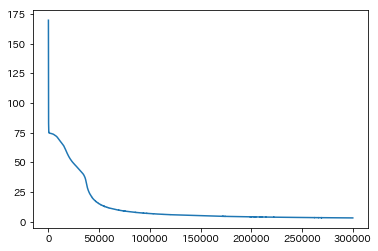

In [34]:
plt.plot(x, diff_all)